### **Key Steps in Data Pre-Processing**
1. **Handling Missing Data** - Removing or imputing missing images in datasets.
2. **Normalization** - Adjusting pixel values to a consistent range.
3. **Scaling** - Resizing images to fit model requirements.
4. **Augmentation** - Generating new images by transformations.
5. **Transformation** - Applying changes such as histogram equalization.

NOTE: This is real case scenario


*   Not possible to recreate dataset
*   Not possible change the camera



# Augmentation
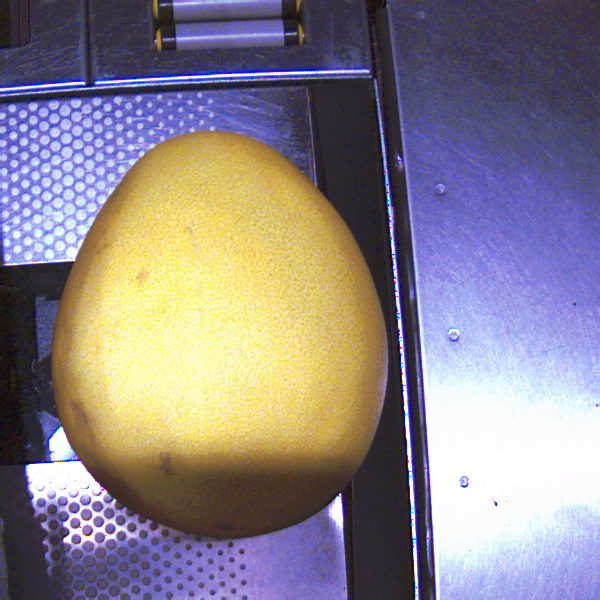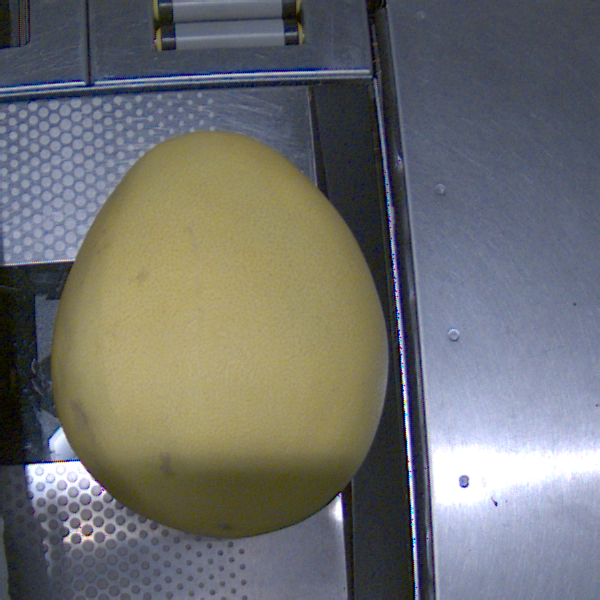

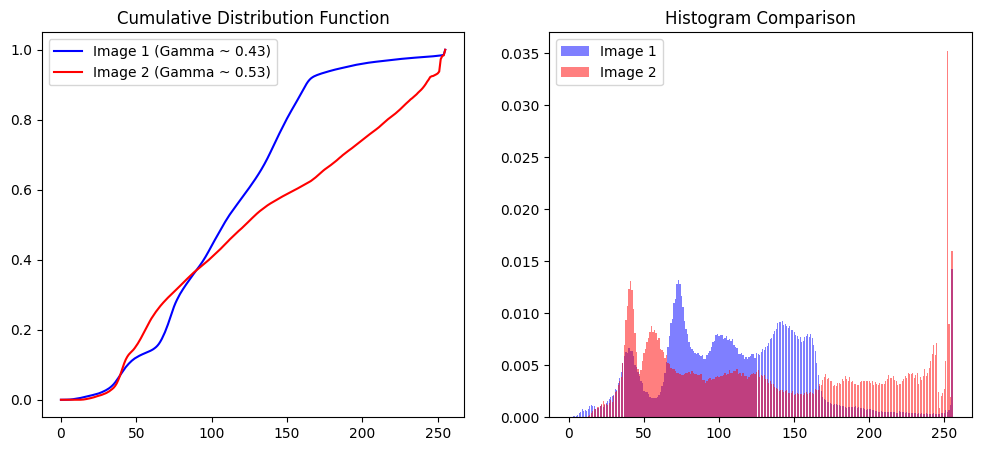

Estimated Gamma for Image 1: 0.43
Estimated Gamma for Image 2: 0.53
Gamma Difference: 0.09


In [ ]:
# doing gamma comparison
import cv2
import numpy as np
import matplotlib.pyplot as plt
import requests
import shutil
from skimage import exposure
from io import BytesIO

# Function to download and save images from GitHub
def download_image(url, filename):
    response = requests.get(url, stream=True)
    if response.status_code == 200:
        with open(filename, 'wb') as file:
            shutil.copyfileobj(response.raw, file)
    else:
        print(f"Failed to download {url}")

# URLs of the images on GitHub (Replace these with your actual image URLs)
target = "https://github.com/alexander-toschev/mbzuai-course/blob/eab24f0de3c4d52fc42535b4d02475ddb9eee55c/images/617ca5db91a0415457dd16b59e51e7cb.png?raw=true"
source = "https://github.com/alexander-toschev/mbzuai-course/blob/eab24f0de3c4d52fc42535b4d02475ddb9eee55c/images/617ca5db91a0415457dd16b59e51e7cb_augmented.png?raw=true"

# Download images
download_image(target, "target.jpg")
download_image(source, "source.jpg")

# Load images
img1 = cv2.imread("target.jpg")
img2 = cv2.imread("source.jpg")

# Convert to grayscale
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# Compute histograms
hist1, bins1 = np.histogram(gray1.flatten(), bins=256, range=[0, 256], density=True)
hist2, bins2 = np.histogram(gray2.flatten(), bins=256, range=[0, 256], density=True)

# Compute cumulative distribution function (CDF)
cdf1 = hist1.cumsum()
cdf1 = cdf1 / cdf1[-1]  # Normalize

cdf2 = hist2.cumsum()
cdf2 = cdf2 / cdf2[-1]  # Normalize

# Estimate gamma correction
gamma1 = exposure.adjust_gamma(gray1, 1.0).mean() / 255.0
gamma2 = exposure.adjust_gamma(gray2, 1.0).mean() / 255.0

gamma_difference = abs(gamma1 - gamma2)

# Plot histograms
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(cdf1, label=f'Image 1 (Gamma ~ {gamma1:.2f})', color='blue')
plt.plot(cdf2, label=f'Image 2 (Gamma ~ {gamma2:.2f})', color='red')
plt.legend()
plt.title("Cumulative Distribution Function")

plt.subplot(1, 2, 2)
plt.bar(range(256), hist1, alpha=0.5, label="Image 1", color='blue')
plt.bar(range(256), hist2, alpha=0.5, label="Image 2", color='red')
plt.legend()
plt.title("Histogram Comparison")

plt.show()

print(f"Estimated Gamma for Image 1: {gamma1:.2f}")
print(f"Estimated Gamma for Image 2: {gamma2:.2f}")
print(f"Gamma Difference: {gamma_difference:.2f}")


What we can see on this diagramm?

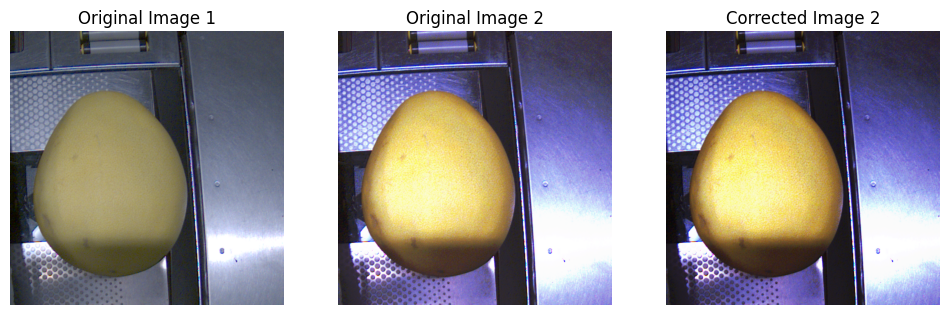

Estimated Gamma for Image 1: 0.43
Estimated Gamma for Image 2: 0.53
Gamma Correction Factor: 0.83
Corrected Image 2 saved as 'image2_corrected.jpg'


In [ ]:
# Convert to grayscale for gamma estimation
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# Estimate gamma values using mean intensity ratios
def estimate_gamma(image):
    mean_intensity = np.mean(image) / 255.0
    return mean_intensity

gamma1 = estimate_gamma(gray1)
gamma2 = estimate_gamma(gray2)

# Calculate the gamma correction factor
gamma_correction = gamma1 / gamma2

# Apply gamma correction to image2
def apply_gamma_correction(image, gamma):
    inv_gamma = 1.0 / gamma
    table = np.array([(i / 255.0) ** inv_gamma * 255 for i in range(256)]).astype("uint8")
    return cv2.LUT(image, table)

corrected_img2 = apply_gamma_correction(img2, gamma_correction)

# Save the corrected image
cv2.imwrite("image2_corrected.jpg", corrected_img2)

# Display images for comparison
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.title("Original Image 1")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.title("Original Image 2")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(corrected_img2, cv2.COLOR_BGR2RGB))
plt.title("Corrected Image 2")
plt.axis("off")

plt.show()

print(f"Estimated Gamma for Image 1: {gamma1:.2f}")
print(f"Estimated Gamma for Image 2: {gamma2:.2f}")
print(f"Gamma Correction Factor: {gamma_correction:.2f}")
print("Corrected Image 2 saved as 'image2_corrected.jpg'")



---

## **📌 1. Gamma Correction (Brightness Adjustment)**
### **Purpose:**
- Adjusts the brightness levels of `image2` to match `image1`.

### **How It Works:**
- Gamma correction is based on the **mean pixel intensity** of the image.
- If `image2` is **brighter** or **darker** than `image1`, we adjust it by a **gamma correction factor**.
- The formula used for gamma correction:
  \[
  I_{\text{new}} = 255 \times \left( \frac{I_{\text{original}}}{255} \right)^{\text{gamma}}
  \]
  where `gamma` is computed as:
  \[
  \text{gamma_correction} = \frac{\text{gamma1}}{\text{gamma2}}
  \]
- If `gamma_correction > 1`, the image is darkened.
- If `gamma_correction < 1`, the image is brightened.

### **Why We Use It:**
- Corrects overall brightness mismatches between `image1` and `image2`.

---

## **📌 2. Histogram Matching (Contrast & Brightness Alignment)**
### **Purpose:**
- Aligns the **contrast and brightness distribution** of `image2` with `image1`.

### **How It Works:**
- Each image has a **histogram**, which represents the **distribution of pixel intensities**.
- `Histogram Matching` **transforms the histogram of `image2`** to match the histogram of `image1`.
- This ensures that **brightness and contrast variations** are reduced.

### **Why We Use It:**
- Helps adjust `image2` so that its **shadows, midtones, and highlights** match `image1`.

---

## **📌 3. Color Transfer (Reinhard Algorithm)**
### **Purpose:**
- Adjusts the **color tones and balance** of `image2` to match `image1`.

### **How It Works:**
- Converts both images to **LAB color space**:
  - `L` (Lightness)
  - `A` (Green to Red)
  - `B` (Blue to Yellow)
- Computes **mean and standard deviation** for each channel.
- Adjusts the `A` and `B` channels of `image2` using the formula:

  $
  I_{\text{new}} = \left( I_{\text{original}} - \mu_{\text{source}} \right) \times \frac{\sigma_{\text{target}}}{\sigma_{\text{source}}} + \mu_{\text{target}}
  $
  where:
  - $ \mu_{\text{source}}, \sigma_{\text{source}} $ are the mean & standard deviation of `image2`.
  - $ \mu_{\text{target}}, \sigma_{\text{target}} $ are the mean & standard deviation of `image1`.
- Finally, converts the image **back to BGR color space**.

### **Why We Use It:**
- Ensures `image2` has the **same color balance and temperature** as `image1`.

---

## **📌 4. CLAHE (Contrast Limited Adaptive Histogram Equalization)**
### **Purpose:**
- Enhances local contrast **without over-brightening the image**.

### **How It Works:**
- Converts the image to **LAB color space** and processes only the **L (Lightness) channel**.
- Applies **Adaptive Histogram Equalization** using **tile-based processing**:
  - Divides the image into small blocks (tiles).
  - Enhances contrast within each tile separately.
- Uses **clip limits** to prevent **over-enhancing** the brightness.
- Merges the enhanced L-channel back with the **A and B color channels**.

### **Why We Use It:**
- Improves **details in dark regions** while keeping **highlights natural**.

---

### **🔥 Summary of All Methods**
| Method                 | Purpose                                   | Effect on Image 2 |
|------------------------|-----------------------------------------|------------------|
| **Gamma Correction**    | Adjusts brightness levels              | Matches brightness |
| **Histogram Matching**  | Aligns brightness & contrast           | Matches tonal range |
| **Color Transfer**      | Matches color balance                  | Matches color tones |
| **CLAHE Enhancement**   | Improves local contrast                | Preserves details |

---

### **📌 Expected Output**
- `image2_corrected.jpg` will **visually resemble** `image1` in brightness, contrast, and colors.



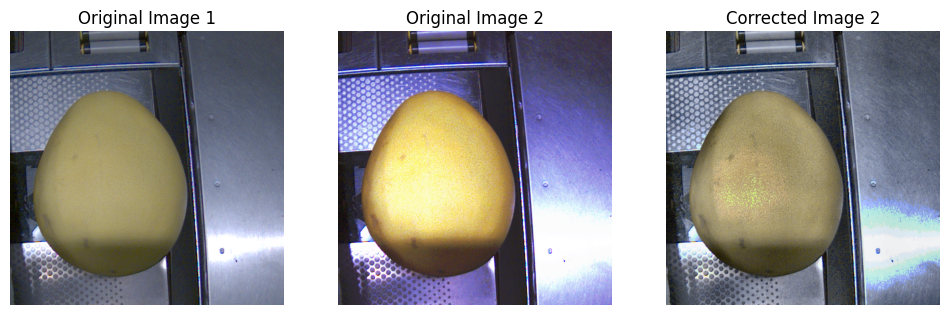

Estimated Gamma for Image 1: 0.43
Estimated Gamma for Image 2: 0.53
Gamma Correction Factor: 0.83
Final Corrected Image 2 saved as 'image2_corrected.jpg'


In [ ]:
# Convert images to grayscale
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

### 1️⃣ Gamma Correction ###
def estimate_gamma(image):
    mean_intensity = np.mean(image) / 255.0
    return mean_intensity

gamma1 = estimate_gamma(gray1)
gamma2 = estimate_gamma(gray2)
gamma_correction = gamma1 / gamma2

def apply_gamma_correction(image, gamma):
    inv_gamma = 1.0 / gamma
    table = np.array([(i / 255.0) ** inv_gamma * 255 for i in range(256)]).astype("uint8")
    return cv2.LUT(image, table)

img2_gamma_corrected = apply_gamma_correction(img2, gamma_correction)

### 2️⃣ Histogram Matching ###
def match_histograms(source, reference):
    matched = exposure.match_histograms(source, reference, channel_axis=-1)
    return np.clip(matched, 0, 255).astype(np.uint8)

img2_hist_matched = match_histograms(img2_gamma_corrected, img1)

### 3️⃣ Color Transfer (Reinhard Method) ###
def color_transfer(source, target):
    source = cv2.cvtColor(source, cv2.COLOR_BGR2LAB).astype(np.float32)
    target = cv2.cvtColor(target, cv2.COLOR_BGR2LAB).astype(np.float32)

    mean_src, std_src = cv2.meanStdDev(source)
    mean_tgt, std_tgt = cv2.meanStdDev(target)

    for i in range(3):
        source[:, :, i] = ((source[:, :, i] - mean_src[i]) * (std_tgt[i] / std_src[i])) + mean_tgt[i]

    source = np.clip(source, 0, 255).astype(np.uint8)
    return cv2.cvtColor(source, cv2.COLOR_LAB2BGR)

img2_color_transferred = color_transfer(img2_hist_matched, img1)

### 4️⃣ Apply CLAHE (Contrast Limited Adaptive Histogram Equalization) ###
def apply_clahe(image):
    lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    l = clahe.apply(l)
    lab = cv2.merge((l, a, b))
    return cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)

img2_final = apply_clahe(img2_color_transferred)

# Save the final corrected image
cv2.imwrite("image2_corrected.jpg", img2_final)

# Display images for comparison
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.title("Original Image 1")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.title("Original Image 2")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(img2_final, cv2.COLOR_BGR2RGB))
plt.title("Corrected Image 2")
plt.axis("off")

plt.show()

print(f"Estimated Gamma for Image 1: {gamma1:.2f}")
print(f"Estimated Gamma for Image 2: {gamma2:.2f}")
print(f"Gamma Correction Factor: {gamma_correction:.2f}")
print("Final Corrected Image 2 saved as 'image2_corrected.jpg'")

